In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Generate training and test datasets

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)


In [5]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

# Visualize the input data

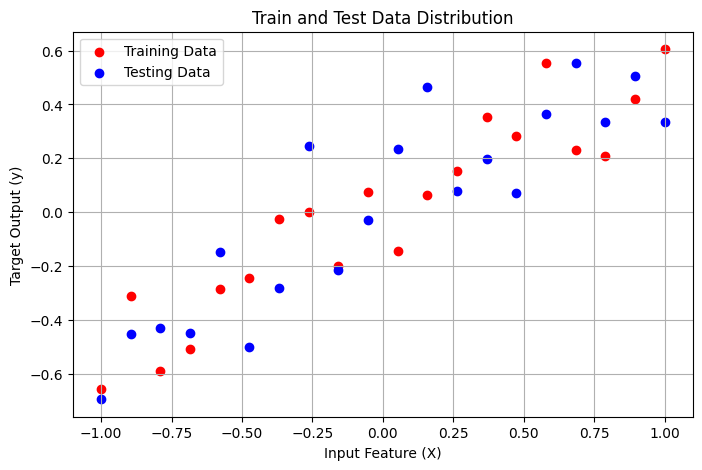

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.title("Train and Test Data Distribution")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target Output (y)")
plt.legend()
plt.grid(True)
plt.show()

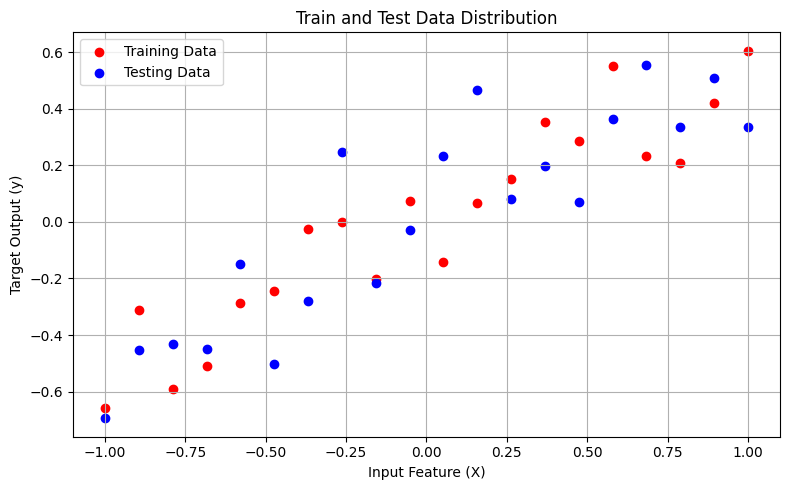

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.title("Train and Test Data Distribution")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target Output (y)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Save to file
image_path = "train_test_data_distribution.png"
plt.savefig(image_path)
plt.close()

# Regression Model Without Dropout

In [7]:
model_no_dropout = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])
model_no_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Regression Model With Dropout

In [8]:
# Model 2: With Dropout
model_with_dropout = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model_with_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)


# Evaluate models

In [9]:
# Evaluate models
train_mse_1, test_mse_1 = model_no_dropout.evaluate(X_train, y_train, verbose=0), model_no_dropout.evaluate(X_test, y_test, verbose=0)
train_mse_2, test_mse_2 = model_with_dropout.evaluate(X_train, y_train, verbose=0), model_with_dropout.evaluate(X_test, y_test, verbose=0)

# Print results

In [10]:
print(f"Model without Dropout - Train MSE: {train_mse_1[1]:.4f}, Test MSE: {test_mse_1[1]:.4f}")
print(f"Model with Dropout    - Train MSE: {train_mse_2[1]:.4f}, Test MSE: {test_mse_2[1]:.4f}")

Model without Dropout - Train MSE: 0.0051, Test MSE: 0.0467
Model with Dropout    - Train MSE: 0.0116, Test MSE: 0.0372


# Predictions

In [11]:
y_pred_1 = model_no_dropout.predict(X_test)
y_pred_2 = model_with_dropout.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


# Visualization of predictions

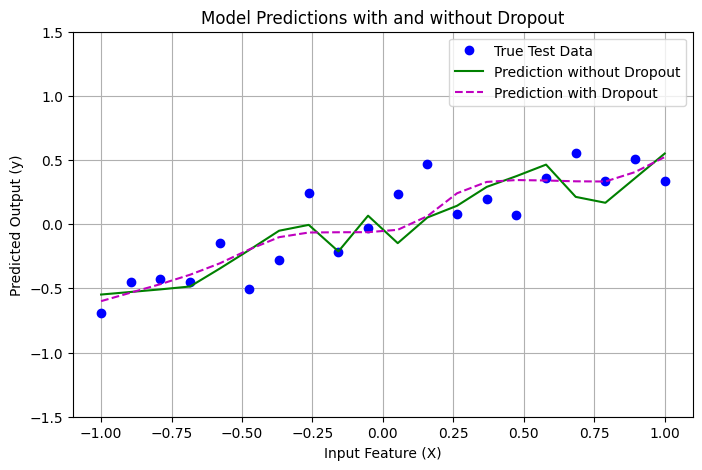

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, 'bo', label="True Test Data")
plt.plot(X_test, y_pred_1, 'g-', label="Prediction without Dropout")
plt.plot(X_test, y_pred_2, 'm--', label="Prediction with Dropout")
plt.title("Model Predictions with and without Dropout")
plt.xlabel("Input Feature (X)")
plt.ylabel("Predicted Output (y)")
plt.ylim([-1.5, 1.5])
plt.legend()
plt.grid(True)
plt.show()
# Save to file
image_path = "Model Predictions with and without Dropout.png"
plt.savefig(image_path)
plt.close()

# Plot training history for both models

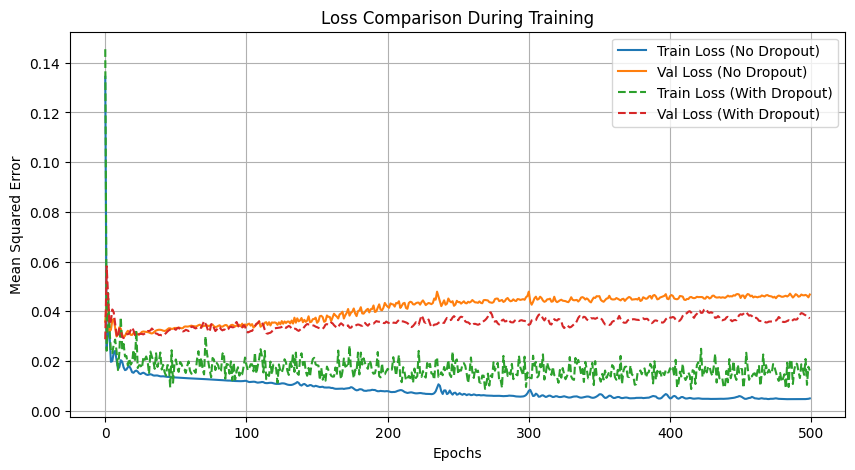

In [20]:
# Plot training history for both models
plt.figure(figsize=(10, 5))
plt.plot(history_no_dropout.history['loss'], label="Train Loss (No Dropout)")
plt.plot(history_no_dropout.history['val_loss'], label="Val Loss (No Dropout)")
plt.plot(history_with_dropout.history['loss'], label="Train Loss (With Dropout)", linestyle='--')
plt.plot(history_with_dropout.history['val_loss'], label="Val Loss (With Dropout)", linestyle='--')
plt.title("Loss Comparison During Training")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()
# Save to file
image_path = "Loss Comparison During Training.png"
plt.savefig(image_path)
plt.close()